# Übungsaufgaben: Yahoo Finance API und Technische Analyse

### Aufgabe 1: Abrufen und Anzeigen von Börsendaten

1. Datenabruf: Verwende die Yahoo Finance API, um historische Börsendaten für ein bestimmtes Unternehmen (z.B. Apple Inc., Symbol: AAPL) abzurufen. Stelle den Zeitraum auf ein Jahr ein (z.B. von 2023-01-01 bis heute).
    - Frage: Welche Bibliothek und Methode werden verwendet, um die Daten von Yahoo Finance herunterzuladen? Erläutere die Parameter, die zur Spezifizierung des Symbols und des Zeitraums benötigt werden.

2. Ergebnis: Zeige die letzten fünf Zeilen der heruntergeladenen Daten an.
    - Frage: Was bedeuten die Spalten Open, High, Low, Close, Volume und Adj Close in den Daten?

##### Lösung
Um historische Börsendaten für ein bestimmtes Unternehmen (z.B. Apple Inc., Symbol: AAPL) für den Zeitraum von 2023-01-01 bis heute abzurufen, verwenden wir die Bibliothek yfinance und die Methode yf.download.


In [ ]:
# Import der benötigten Bibliotheken
import yfinance as yf
from datetime import datetime

# Aktuelles Datum als Enddatum festlegen
today = datetime.now().strftime("%Y-%m-%d")

# Datenabruf für Apple Inc. (Symbol: AAPL) für den Zeitraum von 2023-01-01 bis heute
data = yf.download('AAPL', start="2023-01-01", end=today, progress=False)
# Setzt progress=False, um den Fortschrittsbalken beim Abrufen der Daten auszuschalten.

In [2]:
# Zeige die letzten fünf Zeilen der heruntergeladenen Daten an
print("Die letzten fünf Zeilen der Apple-Aktienhistorie:")
print(data.tail())

Die letzten fünf Zeilen der Apple-Aktienhistorie:
Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2024-11-04 00:00:00+00:00  221.766006  222.009995  222.789993  219.710007   
2024-11-05 00:00:00+00:00  223.204422  223.449997  223.949997  221.139999   
2024-11-06 00:00:00+00:00  222.475235  222.720001  226.070007  221.190002   
2024-11-07 00:00:00+00:00  227.229996  227.479996  227.880005  224.570007   
2024-11-08 00:00:00+00:00  226.960007  226.960007  228.660004  226.410004   

Price                            Open    Volume  
Ticker                           AAPL      AAPL  
Date                                             
2024-11-04 00:00:00+00:00  220.990005  44944500  
2024-11-05 00:00:00+00:00  221.800003  28111300  
2024-11-06 00:00:00+00:00  222.610001  54561100  
2024-11-07 00:00:00+00:00  224.63

### Aufgabe 2: Berechnen der Bollinger Bands

1. Bollinger Bands Berechnung: Implementiere eine Funktion, die die Bollinger Bands berechnet. Diese sollte den Schlusskurs (Close) als Grundlage verwenden und eine gleitende Durchschnittsperiode (n) als Eingabe akzeptieren.
    - Frage: Erkläre die Berechnung der Bollinger Bands und was der UpperBand, MiddleBand, und LowerBand darstellt.

2. Ergebnis: Wende die Funktion auf die Microsoft-Aktie (MSFT) an, um die Bollinger Bands mit einer 20-Tage-Periode zu berechnen. Füge die berechneten Werte als neue Spalten zu deinem DataFrame hinzu.
    - Frage: Was sagt es über die Preisbewegung aus, wenn der Schlusskurs nahe der UpperBand oder der LowerBand liegt?

##### Lösung
Die Bollinger Bands bestehen aus drei Linien:

1. MiddleBand: Ein gleitender Durchschnitt des Schlusskurses über eine bestimmte Periode (n), typischerweise der 20-Tage-Durchschnitt.
2. UpperBand: Die obere Grenze, die berechnet wird, indem man zwei Standardabweichungen zum MiddleBand hinzufügt.
4. LowerBand: Die untere Grenze, die berechnet wird, indem man zwei Standardabweichungen vom MiddleBand abzieht.

Diese Bänder sollen die Volatilität des Aktienpreises anzeigen und helfen, überkaufte oder überverkaufte Bedingungen zu erkennen.

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Funktion zur Berechnung der Bollinger Bands
def calculate_bollinger_bands(data, n=20):
    # Berechnung des gleitenden Durchschnitts (MiddleBand)
    data['MiddleBand'] = data['Close'].rolling(window=n).mean()
    
    # Berechnung der Standardabweichung der Schlusskurse
    data['SD'] = data['Close'].rolling(window=n).std()
    
    # Berechnung des UpperBand und LowerBand
    data['UpperBand'] = data['MiddleBand'] + (2 * data['SD'])
    data['LowerBand'] = data['MiddleBand'] - (2 * data['SD'])
    
    # Entfernen der temporären 'SD'-Spalte
    data.drop(columns=['SD'], inplace=True)
    
    return data

# Abrufen der Microsoft-Aktien-Daten
today = datetime.now().strftime("%Y-%m-%d")
data = yf.download('MSFT', start="2023-01-01", end=today, progress=False)

# Anwenden der Bollinger Bands-Funktion auf die Microsoft-Daten mit einer 20-Tage-Periode
data = calculate_bollinger_bands(data, n=20)

# Zeige die letzten Zeilen an, um die neuen Spalten zu überprüfen
print(data[['Close', 'UpperBand', 'MiddleBand', 'LowerBand']].tail())


Price                           Close   UpperBand  MiddleBand   LowerBand
Ticker                           MSFT                                    
Date                                                                     
2024-11-04 00:00:00+00:00  408.459991  434.299769  419.661501  405.023232
2024-11-05 00:00:00+00:00  411.459991  434.437780  419.499001  404.560221
2024-11-06 00:00:00+00:00  420.179993  434.545119  419.635001  404.724883
2024-11-07 00:00:00+00:00  425.429993  435.127208  420.114500  405.101792
2024-11-08 00:00:00+00:00  422.540009  435.364761  420.425500  405.486240


##### Antwort auf die Frage zur Interpretation der Bollinger Bands

- Wenn der Schlusskurs nahe am UpperBand liegt: Dies deutet oft darauf hin, dass die Aktie möglicherweise überkauft ist und ein Preisrückgang bevorstehen könnte. Trader könnten dies als Zeichen dafür interpretieren, dass die Aktie überbewertet ist.

- Wenn der Schlusskurs nahe am LowerBand liegt: Dies kann bedeuten, dass die Aktie möglicherweise überverkauft ist und ein Preisanstieg folgen könnte. Trader könnten dies als Signal dafür werten, dass die Aktie unterbewertet ist und eine Kaufgelegenheit besteht.

Die Bollinger Bands dienen somit als Indikator, um potenzielle Trendwenden zu erkennen und die Volatilität zu analysieren.

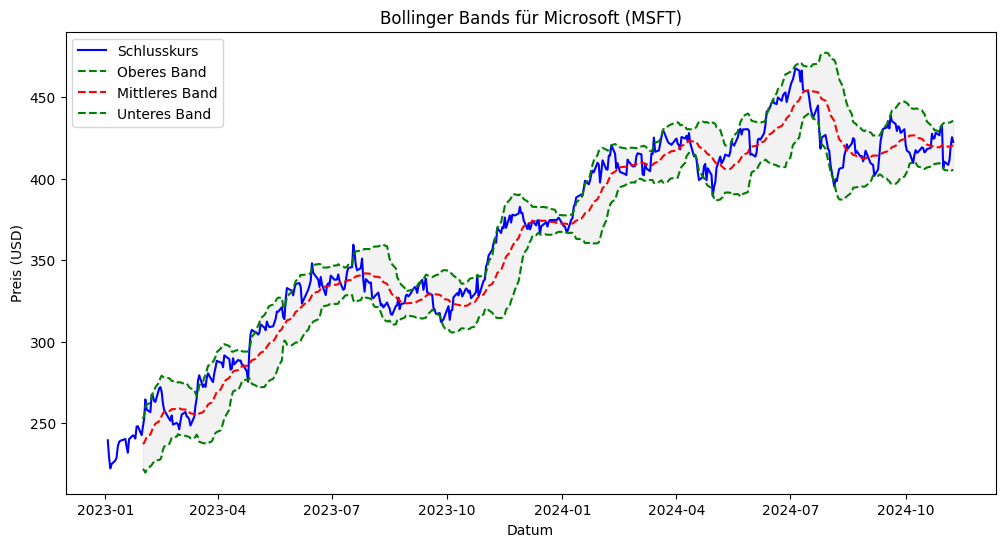

In [5]:
# Visualisierung der Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Schlusskurs', color='blue')
plt.plot(data['UpperBand'], label='Oberes Band', linestyle='--', color='green')
plt.plot(data['MiddleBand'], label='Mittleres Band', linestyle='--', color='red')
plt.plot(data['LowerBand'], label='Unteres Band', linestyle='--', color='green')
plt.fill_between(data.index, data['LowerBand'], data['UpperBand'], color='grey', alpha=0.1)

plt.title('Bollinger Bands für Microsoft (MSFT)')
plt.xlabel('Datum')
plt.ylabel('Preis (USD)')
plt.legend(loc='best')
plt.show()

### Aufgabe 4: Untersuchung und Interpretation der Daten

1. Technische Indikatoren verstehen: Berechne neben den Bollinger Bands noch weitere technische Indikatoren (z.B. den einfachen gleitenden Durchschnitt (SMA) über 20 Tage und 50 Tage) für die Microsoft-Aktie.
    - Frage: Was ist der Unterschied zwischen dem SMA und den Bollinger Bands? Welche Bedeutung hat der SMA in der technischen Analyse?

2. Ergebnis analysieren: Erkläre, was die technischen Indikatoren über die Kursentwicklung aussagen könnten.
    - Frage: Wie könnten Anleger die Bollinger Bands und den SMA für Kauf- und Verkaufsentscheidungen nutzen?

##### Lösung

Teil 1: Berechnung von Technischen Indikatoren - Bollinger Bands und Simple Moving Average (SMA)

Neben den Bollinger Bands berechnen wir hier zwei weitere gleitende Durchschnitte (Simple Moving Averages, SMA) mit Perioden von 20 und 50 Tagen. Der SMA ist ein einfacher Durchschnitt, der die Preise über eine festgelegte Anzahl an Tagen mittelt.

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Funktion zur Berechnung der Bollinger Bands
def calculate_bollinger_bands(data, n=20):
    data['MiddleBand'] = data['Close'].rolling(window=n).mean()
    data['SD'] = data['Close'].rolling(window=n).std()
    data['UpperBand'] = data['MiddleBand'] + (2 * data['SD'])
    data['LowerBand'] = data['MiddleBand'] - (2 * data['SD'])
    data.drop(columns=['SD'], inplace=True)
    return data

# Funktion zur Berechnung des einfachen gleitenden Durchschnitts (SMA)
def calculate_sma(data, periods):
    for period in periods:
        data[f'SMA_{period}'] = data['Close'].rolling(window=period).mean()
    return data

# Daten für Microsoft-Aktie (MSFT) abrufen
today = datetime.now().strftime("%Y-%m-%d")
data = yf.download('MSFT', start="2023-01-01", end=today, progress=False)

# Bollinger Bands mit einer 20-Tage-Periode berechnen
data = calculate_bollinger_bands(data, n=20)

# Berechnung der SMAs (20-Tage und 50-Tage)
data = calculate_sma(data, periods=[20, 50])

# Letzte Zeilen anzeigen, um die neuen Spalten zu überprüfen
print(data[['Close', 'UpperBand', 'MiddleBand', 'LowerBand', 'SMA_20', 'SMA_50']].tail())


Price                           Close   UpperBand  MiddleBand   LowerBand  \
Ticker                           MSFT                                       
Date                                                                        
2024-11-04 00:00:00+00:00  408.459991  434.299769  419.661501  405.023232   
2024-11-05 00:00:00+00:00  411.459991  434.437780  419.499001  404.560221   
2024-11-06 00:00:00+00:00  420.179993  434.545119  419.635001  404.724883   
2024-11-07 00:00:00+00:00  425.429993  435.127208  420.114500  405.101792   
2024-11-08 00:00:00+00:00  422.540009  435.364761  420.425500  405.486240   

Price                          SMA_20      SMA_50  
Ticker                                             
Date                                               
2024-11-04 00:00:00+00:00  419.661501  420.520801  
2024-11-05 00:00:00+00:00  419.499001  420.480201  
2024-11-06 00:00:00+00:00  419.635001  420.607001  
2024-11-07 00:00:00+00:00  420.114500  420.903600  
2024-11-08 00:00:00

##### Antwort zur Frage: Unterschied zwischen SMA und Bollinger Bands

- SMA (Simple Moving Average): Der einfache gleitende Durchschnitt ist ein Durchschnitt des Schlusskurses über eine bestimmte Anzahl an Tagen. Er glättet die Preisbewegungen und gibt den Anlegern ein Gefühl für den allgemeinen Trend der Aktie. Ein 20-Tage-SMA zeigt beispielsweise die durchschnittliche Preisentwicklung der letzten 20 Tage.

- Bollinger Bands: Die Bollinger Bands bestehen aus einem gleitenden Durchschnitt (MiddleBand), dem ein oberes und ein unteres Band hinzugefügt werden, das jeweils zwei Standardabweichungen vom gleitenden Durchschnitt entfernt liegt. Die Bänder reagieren auf die Volatilität – je volatiler der Preis, desto weiter sind die Bänder voneinander entfernt. Im Vergleich zum SMA zeigt das Bollinger Band nicht nur den Trend, sondern auch die Volatilität des Marktes.

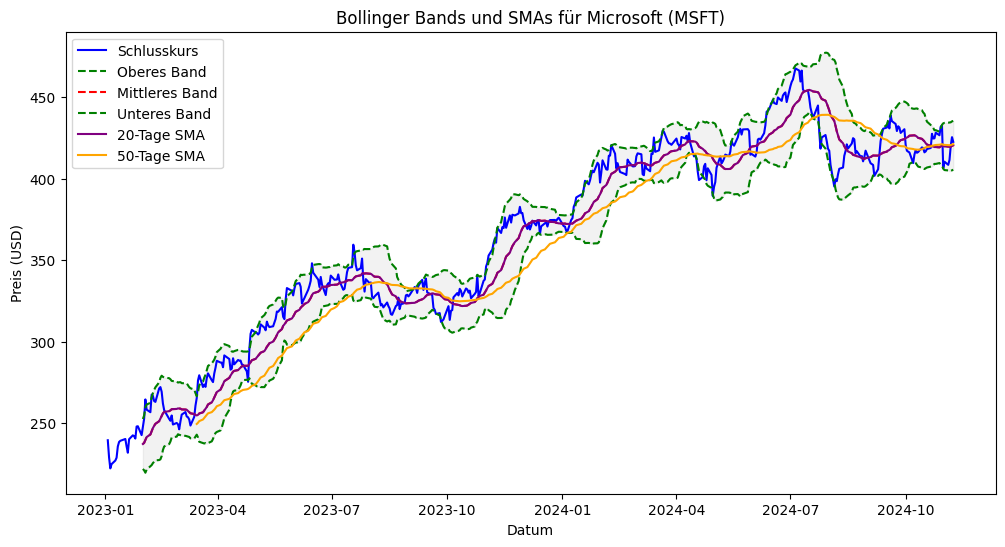

In [8]:
# Visualisierung der Bollinger Bands und SMAs
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Schlusskurs', color='blue')
plt.plot(data['UpperBand'], label='Oberes Band', linestyle='--', color='green')
plt.plot(data['MiddleBand'], label='Mittleres Band', linestyle='--', color='red')
plt.plot(data['LowerBand'], label='Unteres Band', linestyle='--', color='green')
plt.plot(data['SMA_20'], label='20-Tage SMA', color='purple')
plt.plot(data['SMA_50'], label='50-Tage SMA', color='orange')

plt.fill_between(data.index, data['LowerBand'], data['UpperBand'], color='grey', alpha=0.1)
plt.title('Bollinger Bands und SMAs für Microsoft (MSFT)')
plt.xlabel('Datum')
plt.ylabel('Preis (USD)')
plt.legend(loc='best')
plt.show()


##### Antwort zur Frage: Bedeutung des SMA und Nutzen für Kauf- und Verkaufsentscheidungen

- Bedeutung des SMA in der technischen Analyse: Der SMA zeigt den Durchschnittspreis über eine festgelegte Periode. Ein kürzerer SMA (z.B. 20 Tage) reagiert schneller auf Preisänderungen, während ein längerer SMA (z.B. 50 Tage) den allgemeinen Trend über eine längere Zeitspanne widerspiegelt. Ein steigender SMA deutet auf einen Aufwärtstrend hin, während ein fallender SMA auf einen Abwärtstrend hindeutet.

- Bollinger Bands und SMA für Kauf- und Verkaufsentscheidungen:
    - Bollinger Bands: Wenn der Schlusskurs nahe am UpperBand liegt, könnte dies auf eine überkaufte Situation hindeuten, und Anleger könnten erwägen zu verkaufen. Wenn der Schlusskurs nahe am LowerBand liegt, könnte dies auf eine überverkaufte Situation hindeuten, was eine Kaufgelegenheit sein könnte.
    - SMA: Wenn der 20-Tage-SMA über den 50-Tage-SMA steigt (sogenanntes „Golden Cross“), könnte dies auf einen Aufwärtstrend hinweisen und ein Kaufsignal geben. Wenn der 20-Tage-SMA unter den 50-Tage-SMA fällt („Death Cross“), könnte dies auf einen Abwärtstrend hinweisen und ein Verkaufssignal darstellen.

Diese Indikatoren helfen Anlegern, Trends zu erkennen und mögliche Kauf- oder Verkaufsentscheidungen auf der Grundlage der Preisentwicklung und Marktvolatilität zu treffen.